In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.cross_validation import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error;

In [2]:
Stocks = pd.read_csv('Data/DS_Final_Project_Data.csv')

### Data Cleaning
#### Our first task is to "clean" our dataset.  To do this, we will:
- Eliminate 2014 datapoints - we decided to use only three years of data
- Typically, we would remove commas, $-signs, blank spaces/"white space", and other unnecessary characters.  However, our imported data (.csv) file proved quite "clean" of these impurities from the start
- Remove Nan's, NA's, etc.

In [3]:
# Eliminate 2014 datapoints
Stocks1 = Stocks.drop(columns=['SPX_14', 'Px_14', 'Rev_14', 'GP_14', 'EBITDA_14', 'OP_14', 'EPS_14', 'aEPS_14', 'CFO_14', 
                     'FCF_14', 'ROIC_14', 'ROE_14', 'PE_14', 'PCFO_14', 'PCFO_15', 'PCFO_16', 'PCFO_17', 'PS_14']);

In [4]:
Stocks1.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIC_17,ROE_15,ROE_16,ROE_17,PE_15,PE_16,PE_17,PS_15,PS_16,PS_17
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,79.83,68.96,136.80,1397.78,17.54,21.94,29.14,1.01,1.02,1.90
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,14.81,49.92,35.86,35.82,16.47,11.13,17.93,1.59,1.11,1.77
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,23.30,25.33,32.59,35.74,11.70,9.67,10.46,0.51,0.50,0.59
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,7.94,17.01,3.50,12.69,14.51,12.11,13.38,1.23,0.92,1.11
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,8.25,13.27,15.90,11.08,20.07,16.65,20.25,1.21,0.98,1.07


In [5]:
# Drop all "NaN", "NA", and/or other null data
Stocks2 = Stocks1.dropna()

In [6]:
Stocks2.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,ROIC_17,ROE_15,ROE_16,ROE_17,PE_15,PE_16,PE_17,PS_15,PS_16,PS_17
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,79.83,68.96,136.80,1397.78,17.54,21.94,29.14,1.01,1.02,1.90
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,14.81,49.92,35.86,35.82,16.47,11.13,17.93,1.59,1.11,1.77
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,23.30,25.33,32.59,35.74,11.70,9.67,10.46,0.51,0.50,0.59
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,7.94,17.01,3.50,12.69,14.51,12.11,13.38,1.23,0.92,1.11
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,8.25,13.27,15.90,11.08,20.07,16.65,20.25,1.21,0.98,1.07


In [7]:
Stocks2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 2047
Data columns (total 46 columns):
TKR          1016 non-null object
Company      1016 non-null object
Sector       1016 non-null object
Industry     1016 non-null object
SPX_15       1016 non-null float64
SPX_16       1016 non-null float64
SPX_17       1016 non-null float64
Px_15        1016 non-null float64
Px_16        1016 non-null float64
Px_17        1016 non-null float64
Rev_15       1016 non-null float64
Rev_16       1016 non-null float64
Rev_17       1016 non-null float64
GP_15        1016 non-null float64
GP_16        1016 non-null float64
GP_17        1016 non-null float64
EBITDA_15    1016 non-null float64
EBITDA_16    1016 non-null float64
EBITDA_17    1016 non-null float64
OP_15        1016 non-null float64
OP_16        1016 non-null float64
OP_17        1016 non-null float64
EPS_15       1016 non-null float64
EPS_16       1016 non-null float64
EPS_17       1016 non-null float64
aEPS_15      1016 non-

### Feature Engineering
#### Our next task is to conduct "feature engineering", where we will create new features from mathematical operations executed on original features from our dataset (.csv file) 
- Price changes (price returns) - for the 1- and 2-year periods for both the S&P 500 ("SPX_xx") and individual stocks ("Px_xx")
- Relative price changes (relative price returns) - the difference between individual stocks' price changes and the S&P 500's price change for both the 1- and 2-year periods
    - Relative price change is our MODEL'S TARGET FEATURE
- Revenue, profit/EPS, and cash flow growth rates (from the 2016-17 (1-year) and 2015-17 (2-year) periods)
    - Revenue (Rev_xx)
    - Gross profit (GP_xx)
    - EBITDA (EBITDA_xx; earnings before interest, taxes, depreciation and amortization)
    - Operating profit (OP_xx)
    - EPS (EPS_xx; earnings per share)
    - Adjusted EPS (aEPS_xx; removes "non-recurring items" from EPS)
    - Cash flow from Operations (CFO_xx)
    - Free Cash flow (FCF_xx; CFO less capital expenditures)
- Profitability expansion (for the 2016-17 (1-year) and 2015-17 (2-year) periods)
    - Gross margin (gross profit divided by revenue)
    - Operating margin (operating profit divided by revenue)
    - Return on Invested Capital (ROIC_xx; net operating profit divided by invested capital (debt+equity))
    - Return on Equity (ROE_xx; net income divided by equity)

In [51]:
# I noticed there were several "warnings" banners following coding, particularly with respect to feature engineering 
# and visualization graphics of thoses engineered features.  So we will turn off these warnings.
import warnings
warnings.filterwarnings("ignore")

In [52]:
# Generate 1- and 2-year price change data for both the S&P 500 and all stocks in our dataset 
Stocks2['SPX_1617'] = Stocks2.SPX_17 / Stocks2.SPX_16 - 1
Stocks2['SPX_1517'] = Stocks2.SPX_17 / Stocks2.SPX_15 - 1
Stocks2['Px_1617'] = Stocks2.Px_17 / Stocks2.Px_16 - 1
Stocks2['Px_1517'] = Stocks2.Px_17 / Stocks2.Px_15 - 1

# Generate 1- and 2-year RELATIVE PERFORMANCE data for all stocks in our dataset ("Rel_Perf" = Px_XX - SPX_XX)
# => Rel_Perf_XXXX IS OUR TARGET VARIABLE !!!
Stocks2['Rel_Perf_1617'] = Stocks2.Px_1617 - Stocks2.SPX_1617
Stocks2['Rel_Perf_1517'] = Stocks2.Px_1517 - Stocks2.SPX_1517

In [53]:
# Generate revenue, income/EPS, and cash flow growth rate features for both the 1- and 2-year periods
Stocks2['Rev_1617'] = Stocks2.Rev_17 / Stocks2.Rev_16 - 1
Stocks2['Rev_1517'] = Stocks2.Rev_17 / Stocks2.Rev_15 - 1
Stocks2['GP_1617'] = Stocks2.GP_17 / Stocks2.GP_16 - 1
Stocks2['GP_1517'] = Stocks2.GP_17 / Stocks2.GP_15 - 1
Stocks2['EBITDA_1617'] = Stocks2.EBITDA_17 / Stocks2.EBITDA_16 - 1
Stocks2['EBITDA_1517'] = Stocks2.EBITDA_17 / Stocks2.EBITDA_15 - 1
Stocks2['OP_1617'] = Stocks2.OP_17 / Stocks2.OP_16 - 1
Stocks2['OP_1517'] = Stocks2.OP_17 / Stocks2.OP_15 - 1
Stocks2['EPS_1617'] = Stocks2.EPS_17 / Stocks2.EPS_16 - 1
Stocks2['EPS_1517'] = Stocks2.EPS_17 / Stocks2.EPS_15 - 1
Stocks2['aEPS_1617'] = Stocks2.aEPS_17 / Stocks2.aEPS_16 - 1
Stocks2['aEPS_1517'] = Stocks2.aEPS_17 / Stocks2.aEPS_15 - 1
Stocks2['CFO_1617'] = Stocks2.CFO_17 / Stocks2.CFO_16 - 1
Stocks2['CFO_1517'] = Stocks2.CFO_17 / Stocks2.CFO_15 - 1
Stocks2['FCF_1617'] = Stocks2.FCF_17 / Stocks2.FCF_16 - 1
Stocks2['FCF_1517'] = Stocks2.FCF_17 / Stocks2.FCF_15 - 1

In [54]:
# Generate profitability expansion (growth rates) features for both the 1- and 2-year periods

# Interim step: calculate companies' gross margin and operating profit margins for all periods
Stocks2['GM_15'] = Stocks2.GP_15 / Stocks2.Rev_15
Stocks2['GM_16'] = Stocks2.GP_16 / Stocks2.Rev_16
Stocks2['GM_17'] = Stocks2.GP_17 / Stocks2.Rev_17
Stocks2['OPM_15'] = Stocks2.OP_15 / Stocks2.Rev_15
Stocks2['OPM_16'] = Stocks2.OP_16 / Stocks2.Rev_16
Stocks2['OPM_17'] = Stocks2.OP_17 / Stocks2.Rev_17

# Profitability expansion (growth rates) features are calculated here 
Stocks2['GMX_1617'] = Stocks2.GM_17 - Stocks2.GM_16
Stocks2['GMX_1517'] = Stocks2.GM_17 - Stocks2.GM_15
Stocks2['OMX_1617'] = Stocks2.OPM_17 - Stocks2.OPM_16
Stocks2['OMX_1517'] = Stocks2.OPM_17 - Stocks2.OPM_15
Stocks2['ROIX_1617'] = Stocks2.ROIC_17 / Stocks2.ROIC_16 - 1
Stocks2['ROIX_1517'] = Stocks2.ROIC_17 / Stocks2.ROIC_15 - 1
Stocks2['ROEX_1617'] = Stocks2.ROE_17 / Stocks2.ROE_16 - 1
Stocks2['ROEX_1517'] = Stocks2.ROE_17 / Stocks2.ROE_15 - 1 

In [55]:
# Generate valuation expansion features for both the 1- and 2-year periods
Stocks2['PEX_1617'] = Stocks2.PE_17 / Stocks2.PE_16 - 1
Stocks2['PEX_1517'] = Stocks2.PE_17 / Stocks2.PE_15 - 1
Stocks2['PSX_1617'] = Stocks2.PS_17 / Stocks2.PS_16 - 1
Stocks2['PSX_1517'] = Stocks2.PS_17 / Stocks2.PS_15 - 1

In [56]:
Stocks2.head()

,TKR,Company,Sector,Industry,SPX_15,SPX_16,SPX_17,Px_15,Px_16,Px_17,...,OMX_1617,OMX_1517,ROIX_1617,ROIX_1517,ROEX_1617,ROEX_1517,PEX_1617,PEX_1517,PSX_1617,PSX_1517
0,BA,Boeing Company,Industrials,Aerospace & Defense,2043.94,2238.83,2673.61,144.59,155.68,294.91,...,0.049084,0.033044,1.076743,1.459335,9.217690,19.269432,0.328168,0.661345,0.862745,0.881188
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,71.81,56.41,84.83,...,-0.022355,-0.015450,0.115211,-0.307620,-0.001115,-0.282452,0.610961,0.088646,0.594595,0.113208
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,122.83,132.37,176.66,...,-0.001507,0.009436,0.172622,0.452618,0.096655,0.410975,0.081696,-0.105983,0.180000,0.156863
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,43.23,39.44,51.09,...,0.001333,-0.001535,2.658986,-0.349180,2.625714,-0.253968,0.104872,-0.077877,0.206522,-0.097561
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,2043.94,2238.83,2673.61,89.88,81.51,91.54,...,-0.004242,-0.013044,-0.275680,-0.106176,-0.303145,-0.165034,0.216216,0.008969,0.091837,-0.115702


#### Our feature engineering work is complete - we will now commence our predictive modeling efforts
- We will divide our analysis into individual 1-year (2016-17) and 2-year (2015-17) modeling blocks
- We will first create two new dataframes - one each for the 1-year and 2-year assessment.  These new dataframes will include only our engineered independent features and target variable(s) 

#### 2016-2017 (1-year) Stock Performance Analysis

In [13]:
Stocks3 = Stocks2[['TKR', 'Company', 'Sector', 'Industry', 'Rel_Perf_1617', 'Rev_1617', 'GP_1617', 'EBITDA_1617', 
                          'OP_1617', 'aEPS_1617', 'CFO_1617', 'ROIX_1617', 'ROEX_1617', 'PEX_1617', 'PSX_1617']]

In [14]:
Stocks3.head()

,TKR,Company,Sector,Industry,Rel_Perf_1617,Rev_1617,GP_1617,EBITDA_1617,OP_1617,aEPS_1617,CFO_1617,ROIX_1617,ROEX_1617,PEX_1617,PSX_1617
0,BA,Boeing Company,Industrials,Aerospace & Defense,0.700135,-0.012467,0.257238,0.627551,0.815276,0.662983,0.270978,1.076743,9.217690,0.328168,0.862745
1,APTV,Aptiv PLC,Consumer Discretionary,Auto Components,0.309612,0.049699,-0.019070,-0.068950,-0.116696,-0.117871,0.347759,0.115211,-0.001115,0.610961,0.594595
2,LEA,Lear Corporation,Consumer Discretionary,Auto Components,0.140393,0.102718,0.061773,0.092400,0.083180,0.211689,0.101155,0.172622,0.096655,0.081696,0.180000
3,BWA,BorgWarner Inc.,Consumer Discretionary,Auto Components,0.101186,0.079902,0.094544,0.078694,0.091602,0.189602,0.139616,2.658986,2.625714,0.104872,0.206522
4,ALV,Autoliv Inc.,Consumer Discretionary,Auto Components,-0.071147,0.030674,0.038964,0.020532,-0.018915,-0.024691,0.077729,-0.275680,-0.303145,0.216216,0.091837


In [15]:
Stocks_1617 = Stocks3.dropna()

In [16]:
Stocks_1617.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 2047
Data columns (total 15 columns):
TKR              1015 non-null object
Company          1015 non-null object
Sector           1015 non-null object
Industry         1015 non-null object
Rel_Perf_1617    1015 non-null float64
Rev_1617         1015 non-null float64
GP_1617          1015 non-null float64
EBITDA_1617      1015 non-null float64
OP_1617          1015 non-null float64
aEPS_1617        1015 non-null float64
CFO_1617         1015 non-null float64
ROIX_1617        1015 non-null float64
ROEX_1617        1015 non-null float64
PEX_1617         1015 non-null float64
PSX_1617         1015 non-null float64
dtypes: float64(11), object(4)
memory usage: 126.9+ KB


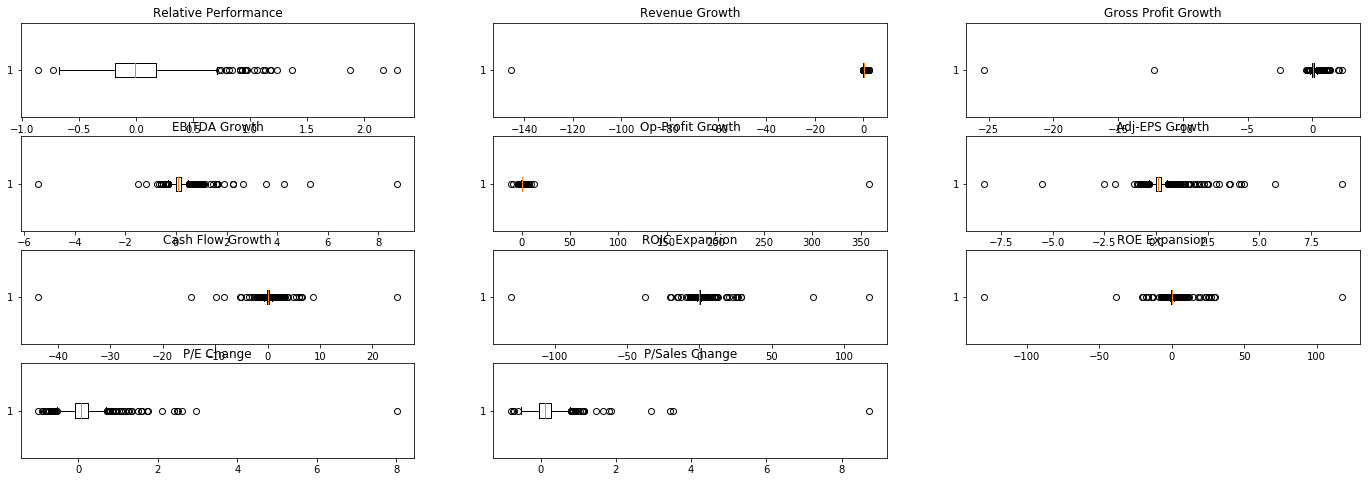

In [48]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax11 = fig.add_subplot(4,3,11)
ax1.boxplot(Stocks_1617.Rel_Perf_1617, vert=False), ax1.set_title('Relative Performance')
ax2.boxplot(Stocks_1617.Rev_1617, vert=False), ax2.set_title('Revenue Growth')
ax3.boxplot(Stocks_1617.GP_1617, vert=False), ax3.set_title('Gross Profit Growth')
ax4.boxplot(Stocks_1617.EBITDA_1617, vert=False), ax4.set_title('EBITDA Growth')
ax5.boxplot(Stocks_1617.OP_1617, vert=False), ax5.set_title('Op-Profit Growth')
ax6.boxplot(Stocks_1617.aEPS_1617, vert=False), ax6.set_title('Adj-EPS Growth')
ax7.boxplot(Stocks_1617.CFO_1617, vert=False), ax7.set_title('Cash Flow Growth')
ax8.boxplot(Stocks_1617.ROIX_1617, vert=False), ax8.set_title('ROIC Expansion')
ax9.boxplot(Stocks_1617.ROEX_1617, vert=False), ax9.set_title('ROE Expansion')
ax10.boxplot(Stocks_1617.PEX_1617, vert=False), ax10.set_title('P/E Change')
ax11.boxplot(Stocks_1617.PSX_1617, vert=False), ax11.set_title('P/Sales Change');

In [49]:
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rel_Perf_1617-Stocks_1617.Rel_Perf_1617.mean())<=(1*Stocks_1617.Rel_Perf_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.Rev_1617-Stocks_1617.Rev_1617.mean())<=(1*Stocks_1617.Rev_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.GP_1617-Stocks_1617.GP_1617.mean())<=(1*Stocks_1617.GP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.EBITDA_1617-Stocks_1617.EBITDA_1617.mean())<=(1*Stocks_1617.EBITDA_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.OP_1617-Stocks_1617.OP_1617.mean())<=(1*Stocks_1617.OP_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.aEPS_1617-Stocks_1617.aEPS_1617.mean())<=(1*Stocks_1617.aEPS_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.CFO_1617-Stocks_1617.CFO_1617.mean())<=(1*Stocks_1617.CFO_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROIX_1617-Stocks_1617.ROIX_1617.mean())<=(1*Stocks_1617.ROIX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.ROEX_1617-Stocks_1617.ROEX_1617.mean())<=(1*Stocks_1617.ROEX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PEX_1617-Stocks_1617.PEX_1617.mean())<=(1*Stocks_1617.PEX_1617.std())]
Stocks_clean = Stocks_1617[np.abs(Stocks_1617.PSX_1617-Stocks_1617.PSX_1617.mean())<=(1*Stocks_1617.PSX_1617.std())];

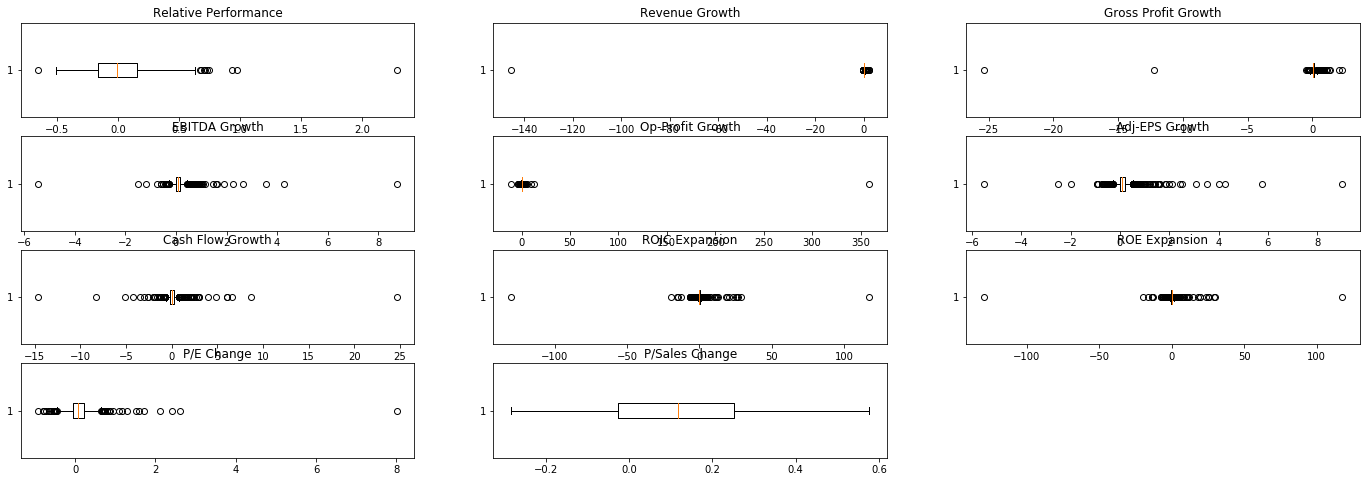

In [50]:
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax11 = fig.add_subplot(4,3,11)
ax1.boxplot(Stocks_clean.Rel_Perf_1617, vert=False), ax1.set_title('Relative Performance')
ax2.boxplot(Stocks_clean.Rev_1617, vert=False), ax2.set_title('Revenue Growth')
ax3.boxplot(Stocks_clean.GP_1617, vert=False), ax3.set_title('Gross Profit Growth')
ax4.boxplot(Stocks_clean.EBITDA_1617, vert=False), ax4.set_title('EBITDA Growth')
ax5.boxplot(Stocks_clean.OP_1617, vert=False), ax5.set_title('Op-Profit Growth')
ax6.boxplot(Stocks_clean.aEPS_1617, vert=False), ax6.set_title('Adj-EPS Growth')
ax7.boxplot(Stocks_clean.CFO_1617, vert=False), ax7.set_title('Cash Flow Growth')
ax8.boxplot(Stocks_clean.ROIX_1617, vert=False), ax8.set_title('ROIC Expansion')
ax9.boxplot(Stocks_clean.ROEX_1617, vert=False), ax9.set_title('ROE Expansion')
ax10.boxplot(Stocks_clean.PEX_1617, vert=False), ax10.set_title('P/E Change')
ax11.boxplot(Stocks_clean.PSX_1617, vert=False), ax11.set_title('P/Sales Change');

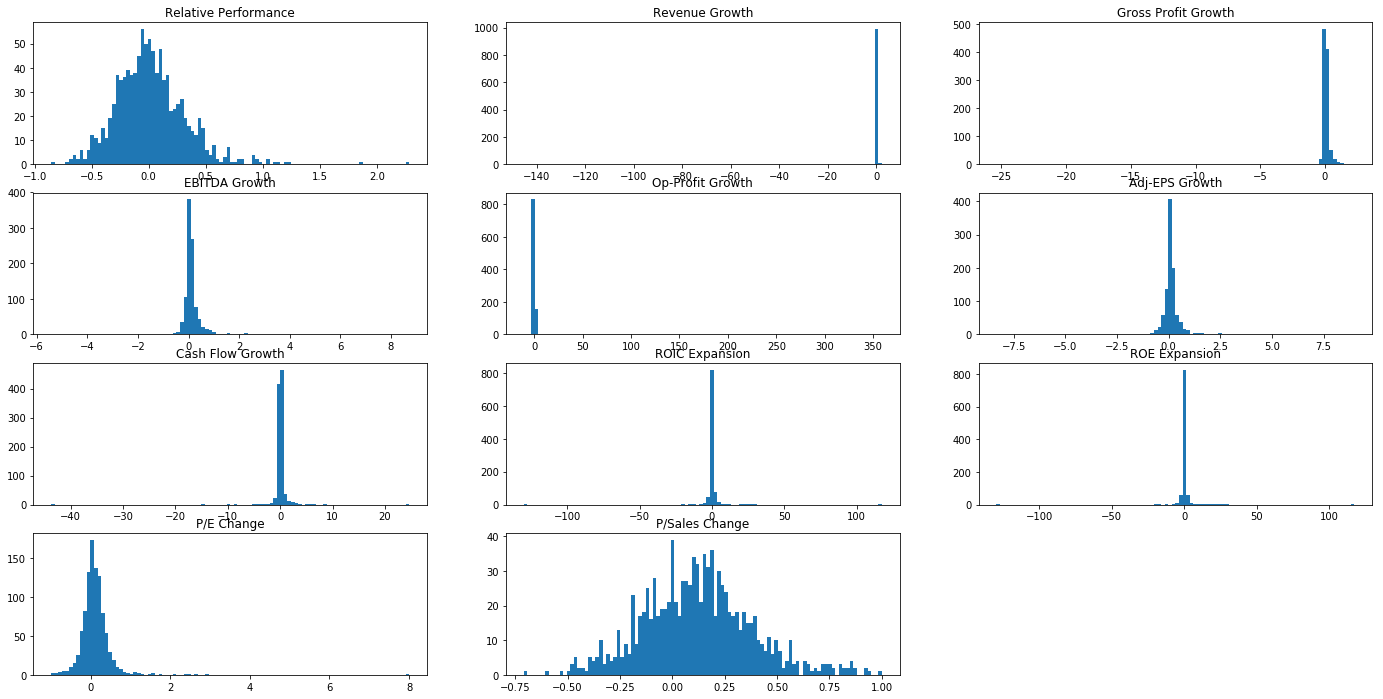

In [21]:
#Stocks_clean.hist(column='Rel_Perf_1617', bins=100)
fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax11 = fig.add_subplot(4,3,11)
ax1.hist(Stocks_clean.Rel_Perf_1617, bins=100), ax1.set_title('Relative Performance')
ax2.hist(Stocks_clean.Rev_1617, bins=100), ax2.set_title('Revenue Growth')
ax3.hist(Stocks_clean.GP_1617, bins=100), ax3.set_title('Gross Profit Growth')
ax4.hist(Stocks_clean.EBITDA_1617, bins=100), ax4.set_title('EBITDA Growth')
ax5.hist(Stocks_clean.OP_1617, bins=100), ax5.set_title('Op-Profit Growth')
ax6.hist(Stocks_clean.aEPS_1617, bins=100), ax6.set_title('Adj-EPS Growth')
ax7.hist(Stocks_clean.CFO_1617, bins=100), ax7.set_title('Cash Flow Growth')
ax8.hist(Stocks_clean.ROIX_1617, bins=100), ax8.set_title('ROIC Expansion')
ax9.hist(Stocks_clean.ROEX_1617, bins=100), ax9.set_title('ROE Expansion')
ax10.hist(Stocks_clean.PEX_1617, bins=100), ax10.set_title('P/E Change')
ax11.hist(Stocks_clean.PSX_1617, bins=100), ax11.set_title('P/Sales Change');

In [33]:
# 
Stocks_corr = Stocks_clean.corr()
Stocks_corr

,Rel_Perf_1617,Rev_1617,GP_1617,EBITDA_1617,OP_1617,aEPS_1617,CFO_1617,ROIX_1617,ROEX_1617,PEX_1617,PSX_1617
Rel_Perf_1617,1.000000,0.019249,0.079006,0.206496,-0.021925,0.253643,0.169323,-0.004745,0.006863,0.299218,0.851969
Rev_1617,0.019249,1.000000,0.875033,-0.001595,0.000312,0.014209,0.007376,-0.001218,-0.000720,0.002280,-0.008889
GP_1617,0.079006,0.875033,1.000000,0.117297,-0.001252,0.037288,0.033526,-0.003368,-0.002269,-0.033681,0.019709
EBITDA_1617,0.206496,-0.001595,0.117297,1.000000,-0.108173,0.135036,0.137622,-0.056673,-0.056928,-0.264332,0.066803
OP_1617,-0.021925,0.000312,-0.001252,-0.108173,1.000000,-0.007518,-0.000687,0.010015,0.012767,0.032471,-0.020849
aEPS_1617,0.253643,0.014209,0.037288,0.135036,-0.007518,1.000000,0.053462,-0.016024,-0.013755,-0.217829,0.117419
CFO_1617,0.169323,0.007376,0.033526,0.137622,-0.000687,0.053462,1.000000,0.004056,0.006063,0.054254,0.097946
ROIX_1617,-0.004745,-0.001218,-0.003368,-0.056673,0.010015,-0.016024,0.004056,1.000000,0.991634,0.030658,0.004965
ROEX_1617,0.006863,-0.000720,-0.002269,-0.056928,0.012767,-0.013755,0.006063,0.991634,1.000000,0.039760,0.016903
PEX_1617,0.299218,0.002280,-0.033681,-0.264332,0.032471,-0.217829,0.054254,0.030658,0.039760,1.000000,0.405660


#### The correlation matrix, above, tells us several things:
- The features with the highest correlation to Rel_Perf_1617 are EBITDA_1617 (0.206), aEPS (0.254), CFO_1617 (0.169), PEX_1617 (0.299), and PSX_1617 (0.852); 
- The highest correlation between these five features (autocorrelation/collinearity) exists between PEX_1617 and PSX_1617 (0.406).  This is an encouraging result in that we can be comfortable using all five in our model. 

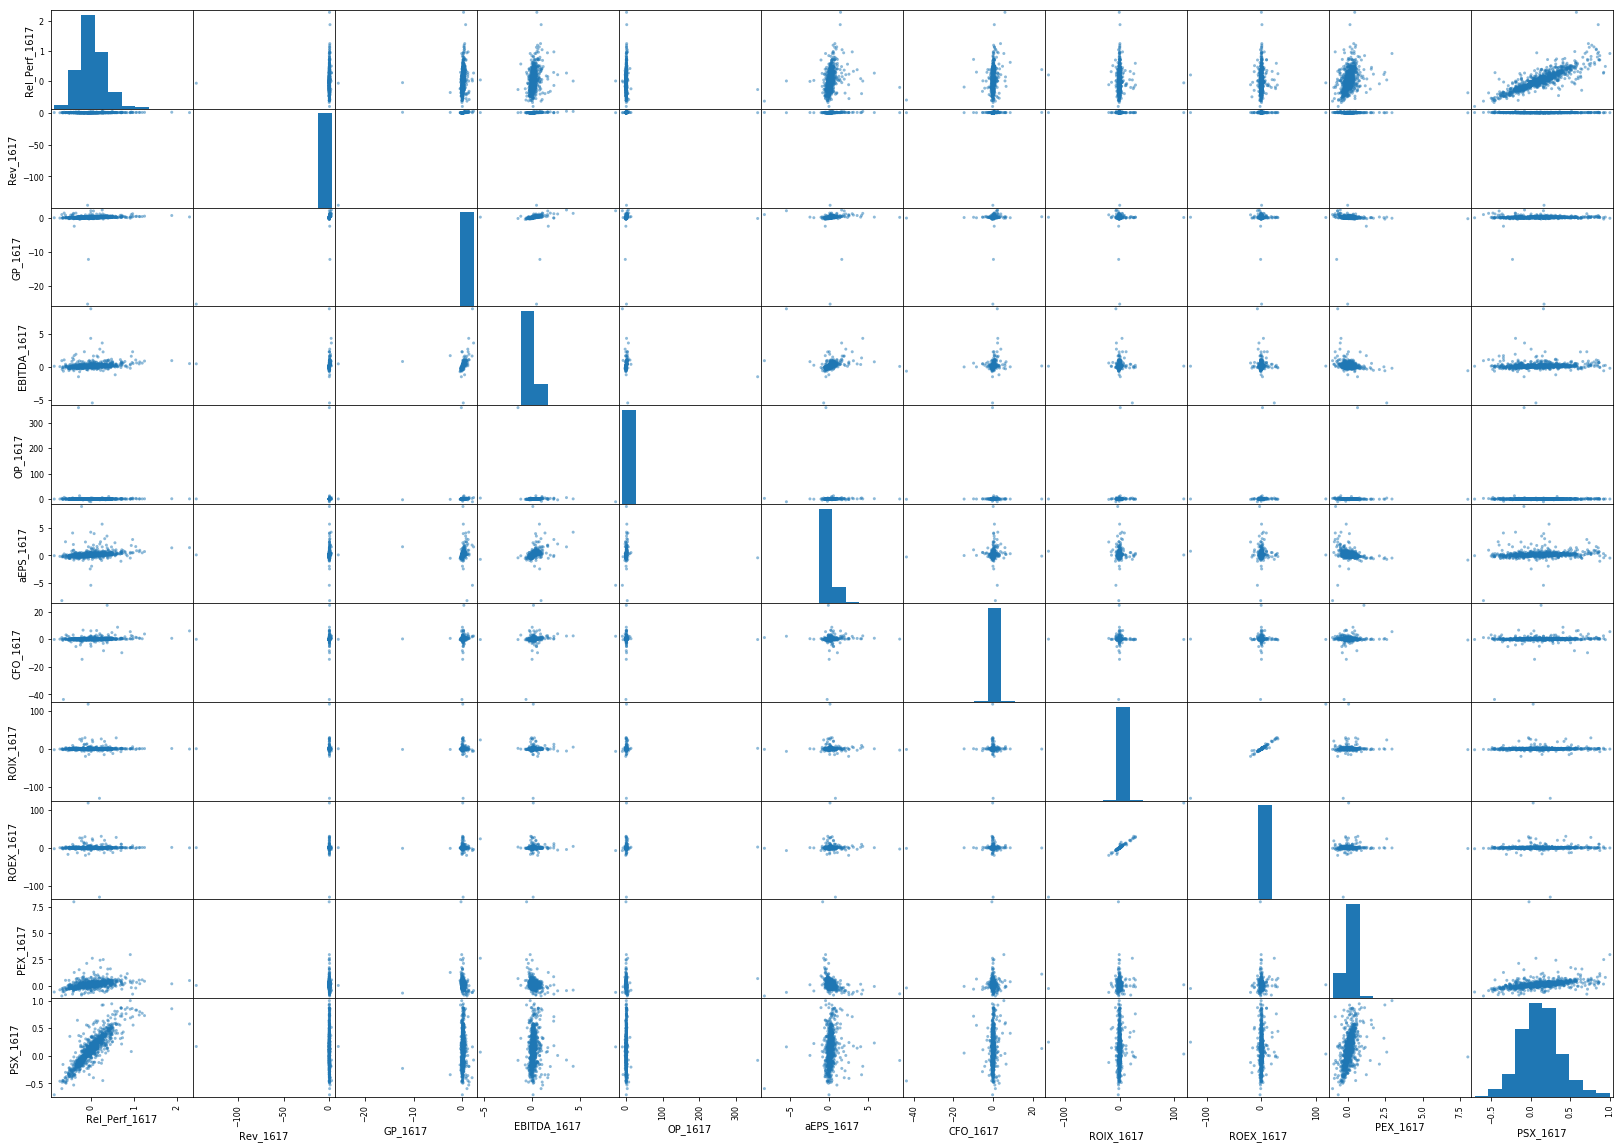

In [41]:
scatter_matrix(Stocks_clean, figsize = (28,20));

### We will now begin our linear regression model fitting.
- First, we split the data into training and test sets via "train-test-split".
- Then will fit our linear regression models with the training set and evaluate our models' performance.

In [35]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
# Instantiate and fit linear regression model
lr = LinearRegression()
X = Stocks_clean[['EBITDA_1617', 'aEPS_1617', 'CFO_1617', 'PEX_1617', 'PSX_1617']]
y = Stocks_clean.Rel_Perf_1617
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Predict stock performance on test data
Stocks_predict = lr.predict(X_test)

In [46]:
# evaluate performance
# mse, rmse
np.sqrt(mean_squared_error(y_test, Stocks_predict))

0.2328701332755861